In [338]:
#from __future__ import absolute_import
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import json 

from google.oauth2 import service_account
from google.cloud import bigquery
from bq_helper import BigQueryHelper

from google.cloud.bigquery import magics

In [32]:
'''

Set up Google Cloud authentication and download the json file with credentials.
Documentation here:
https://cloud.google.com/bigquery/docs/authentication/service-account-file

'''

'\n\nSet up Google Cloud authentication and download the json file with credentials.\nDocumentation here:\nhttps://cloud.google.com/bigquery/docs/authentication/service-account-file\n\n'

In [67]:
''' Set Google BigQuery project id and connect
'''

# Set key_path to the path to the service account key file.

key_path = "/Users/lorajohns/NYCTransit.json"
service_account_info = json.load(open(key_path))
credentials = service_account.Credentials.from_service_account_info(
    service_account_info)

#credentials = service_account.Credentials.from_service_account_file(
#    key_path,
#    scopes=["https://www.googleapis.com/auth/cloud-platform"],
#)

project_id = 'nyc-transit-256016'

client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id,
)
 
#client = bigquery.Client(project=PROJECT_ID, location="US")
#dataset = client.create_dataset('example', exists_ok=True)

magics.context.project = project_id

'''
Create a reference to the training data table 
Display head as dataframe
'''
#table = client.get_table()

#client.list_rows(table, max_results=5).to_dataframe()

'''
Cell magic:

Command: %%bigquery
Use: run a SQL query and return the results as a Pandas DataFrame
Note: Entire jupyter cell is treated as a SQL query; tab-complete disabled

'''
#%load_ext google.cloud.bigquery
%reload_ext google.cloud.bigquery

In [34]:
#bq_assistant = BigQueryHelper(project_id, "tlc_yellow_trips_2018")
# bq_assistant.list_tables()
# bq_assistant.head("global_air_quality", num_rows=3)
# bq_assistant.table_schema("global_air_quality")
# QUERY = "SELECT location, timestamp, pollutant FROM `bigquery-public-data.openaq.global_air_quality`"
# df = bq_assistant.query_to_pandas(QUERY)
# df = bq_assistant.query_to_pandas_safe(QUERY)

In [68]:
table = client.get_table('nyc_taxi.tlc_yellow_trips_2018')

In [69]:
samp = client.list_rows(table, max_results=10000).to_dataframe()

In [159]:
samp.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2.0,2018-03-16 23:38:24,2018-03-17 00:28:53,1,10.68,1,N,1,40,0.5,0.5,9.41,5.76,0.3,56.47,186,225
1,2.0,2018-03-16 23:24:47,2018-03-17 00:12:19,1,8.02,1,N,1,33,0.5,0.5,8.01,5.76,0.3,48.07,230,225
2,2.0,2018-03-16 23:12:14,2018-03-16 23:36:53,1,8.36,1,N,1,28,0.5,0.5,5.86,0,0.3,35.16,79,42
3,2.0,2018-03-16 22:58:19,2018-03-16 23:43:51,1,20.06,1,N,1,60.5,0.5,0.5,16.89,5.76,0.3,84.45,97,208
4,1.0,2018-03-16 22:24:25,2018-03-16 22:57:14,1,9.9,1,N,1,32,0.5,0.5,6.65,0,0.3,39.95,238,33


In [158]:
samp.trip_distance[0]

Decimal('10.68')

In [160]:
pandas_profiling.ProfileReport(samp)

In [ ]:
# Not 'safe' to run!
# client.list_rows(table).to_dataframe()

In [110]:
'''TO-DO: dictionary to hold multiple queries in memory'''

class DB:
    def __init__(self):
        self.string = ""
    
    #def sql(self, qstring):
    #    self.qstring = qstring
    
    def query(self, string):
        #if stored=True:
        return client.query(string).to_dataframe()

In [45]:
sql = """
SELECT
    trip_distance AS distance, total_amount AS total
FROM `nyc_taxi.tlc_yellow_trips_2018`
ORDER BY trip_distance DESC
LIMIT 15;
"""

total_amount = client.query(sql).to_dataframe()

In [113]:
db = DB()

df = db.query("""
SELECT
    trip_distance AS distance, total_amount AS total
FROM `nyc_taxi.tlc_yellow_trips_2018`
ORDER BY trip_distance DESC
LIMIT 5000;
""")
df

,distance,total
0,189483.84,4
1,7655.76,10001.3
2,6204.84,10000.3
3,6098.63,10000.3
4,5381.5,10001.3
5,4016.82,10000.3
6,2408.25,6023.8
7,2231.35,5581.3
8,2053.01,5134.8
9,1928.47,4824.3


In [121]:
ten_k = db.query("""
SELECT total_amount, trip_distance
FROM `nyc_taxi.tlc_yellow_trips_2018`
WHERE total_amount BETWEEN 10000 AND 11000
;

""")

In [122]:
ten_k

,total_amount,trip_distance
0,10000.3,6204.84
1,10001.3,7655.76
2,10000.3,6098.63
3,10001.3,5381.5
4,10000.3,4016.82
5,10005.72,258


In [114]:
def to_float(df, cols):
    for col in cols:
        df[col] = df[col].apply(lambda x: float(x))
        
to_float(total_amount, total_amount.columns)

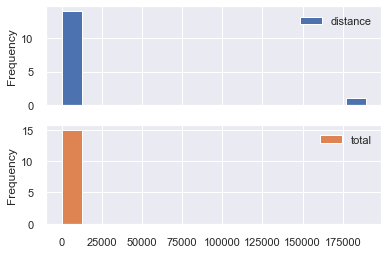

In [340]:
total_amount.plot(kind='hist',subplots=True, bins=15);

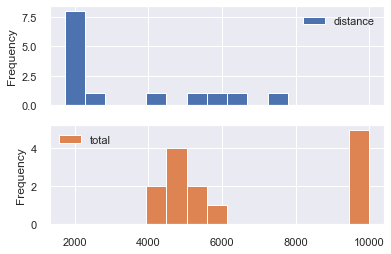

In [339]:
total_amount[(total_amount.distance < 8000) & (total_amount.total > 4)].plot(kind='hist',bins=15, subplots=True);

In [ ]:
price_per_mile = db.query("""
SELECT (total_amount/trip_distance) AS dollars_per_mile, trip_distance, total_amount
FROM `nyc_taxi.tlc_yellow_trips_2018`
WHERE trip_distance > 0
ORDER BY dollars_per_mile DESC
""")

In [ ]:
price_per_mile

In [195]:
avg_dist_per_date = db.query("""SELECT 
  EXTRACT(MONTH FROM pickup_datetime) AS month,
  EXTRACT(DAY FROM pickup_datetime) AS day,
  EXTRACT(HOUR FROM pickup_datetime) AS hour,
  AVG(CAST(trip_distance AS FLOAT64)) AS avg_distance, AVG(CAST(fare_amount AS FLOAT64)) AS avg_fare, AVG(CAST(tip_amount AS FLOAT64)) AS avg_tip, AVG(CAST(total_amount AS FLOAT64)) AS avg_total, AVG(CAST(mta_tax AS FLOAT64)) AS avg_tax, AVG(CAST(tolls_amount AS FLOAT64)) AS avg_tolls
FROM `nyc-transit-256016.nyc_taxi.tlc_yellow_trips_2018`
WHERE trip_distance BETWEEN 0 AND 2000 AND total_amount > 0
GROUP BY month, day, hour
ORDER BY month, day, hour
;""")

In [236]:
avg_dist_per_date.head()

month            1.000000
day              1.000000
hour             2.000000
avg_distance     3.109451
avg_fare        13.096146
avg_tip          1.642896
avg_total       16.183629
avg_tax          0.496234
avg_tolls        0.146663
dtype: float64

In [377]:
dates = {"Valentine's Day": (2, 14), "St. Patrick's Day": (3, 17), "Christmas Eve": (12, 24), "Christmas Day": (12, 15), "New Year's Day": (1,1), "July 4": (7, 4), "Labor Day": (9, 13), "Tues. after Labor Day": (9, 14), "Halloween 'Eve'": (10, 30), "Halloween": (10, 31)}
metrics = ['avg_distance','avg_fare','avg_tip','avg_total','avg_tax','avg_tolls']


def on_this_day(dates, metrics):
    '''
    input: dict of dates, list of dataframe columns to plot
    output: figure plotting individual dates of interest against the average day for 2018
    '''
    x = [x for x in range(24)]
    xi = [str(x) for x in range(24)]
    
    for i, metric in enumerate(metrics):
        plt.figure(i)
        for k,v in dates.items():
        # print(k,v[0],v[1])
        # print(avg_dist_per_date[(avg_dist_per_date.month == v[0]) & (avg_dist_per_date.day == v[1])].head(1))
            ax = avg_dist_per_date[(avg_dist_per_date.month == v[0]) & (avg_dist_per_date.day == v[1])].groupby(by=['month','day','hour']).mean()[metric].plot(figsize=(20,9))
            ax.legend(dates.keys())
            ax.set(xlabel='hour', ylabel=f'{metric}', title=f'{metric} of cab trips per hour on holidays')
        
        avg_dist_per_date.groupby('hour').mean()[metric].plot(figsize=(20,9), linestyle='dashed', legend='overall average')# why is the legend so annoying 
        plt.xticks(x, xi)
        plt.savefig(metric + '.png')  
    

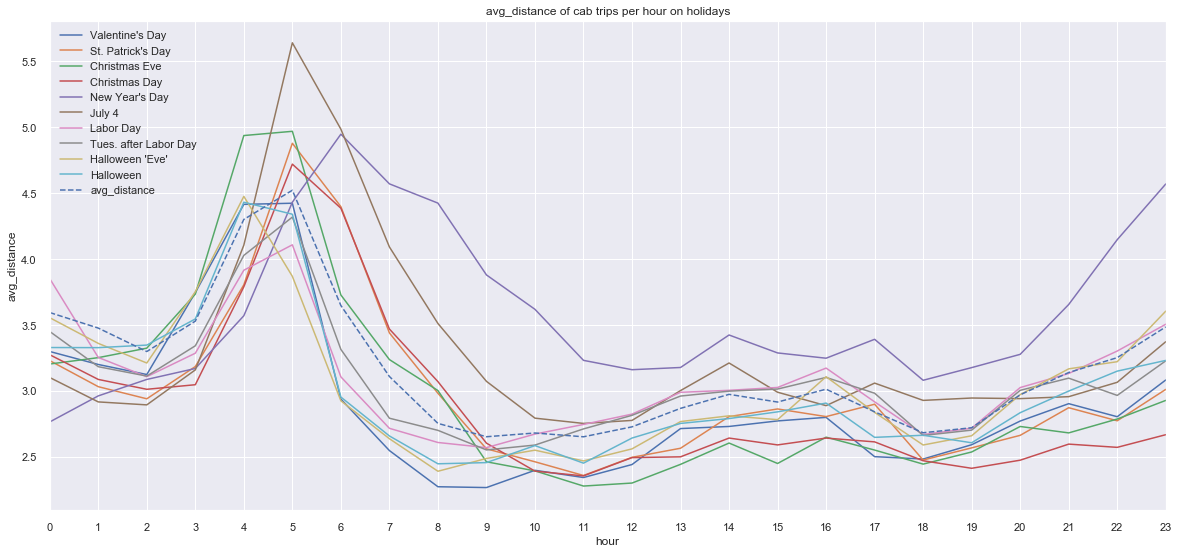

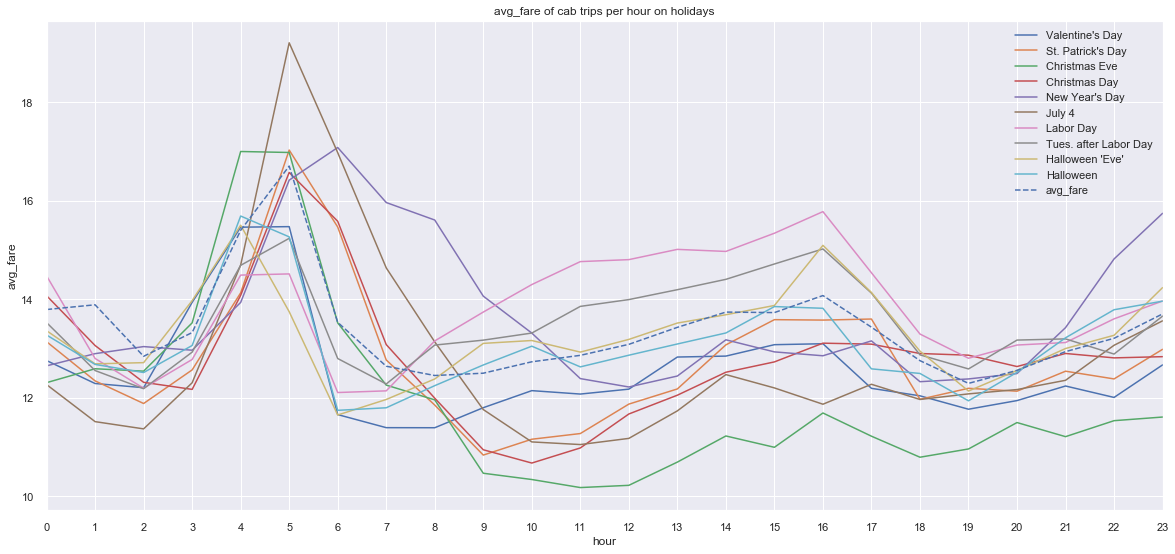

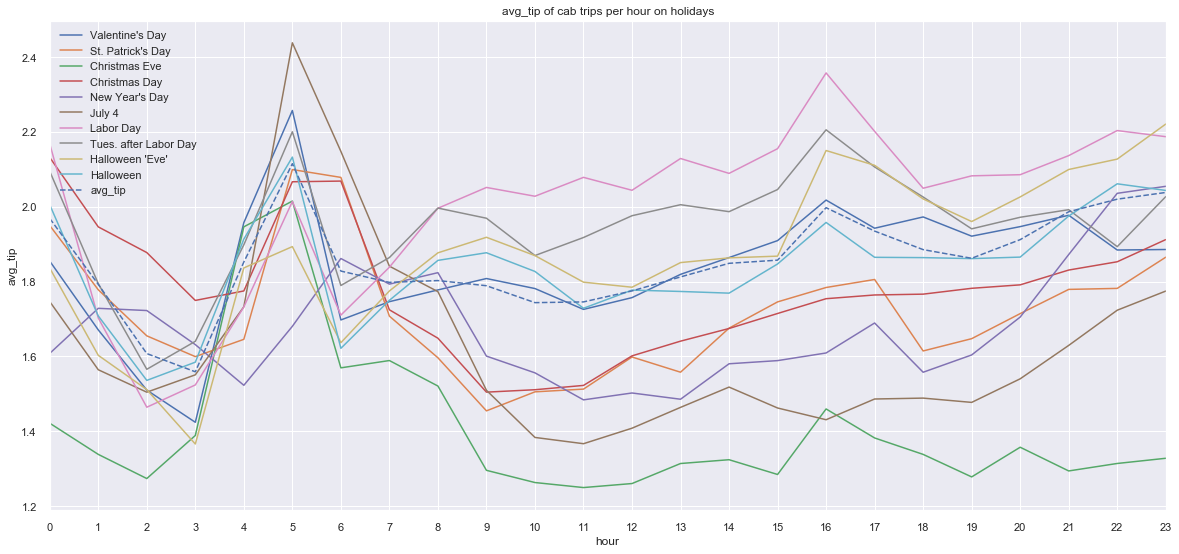

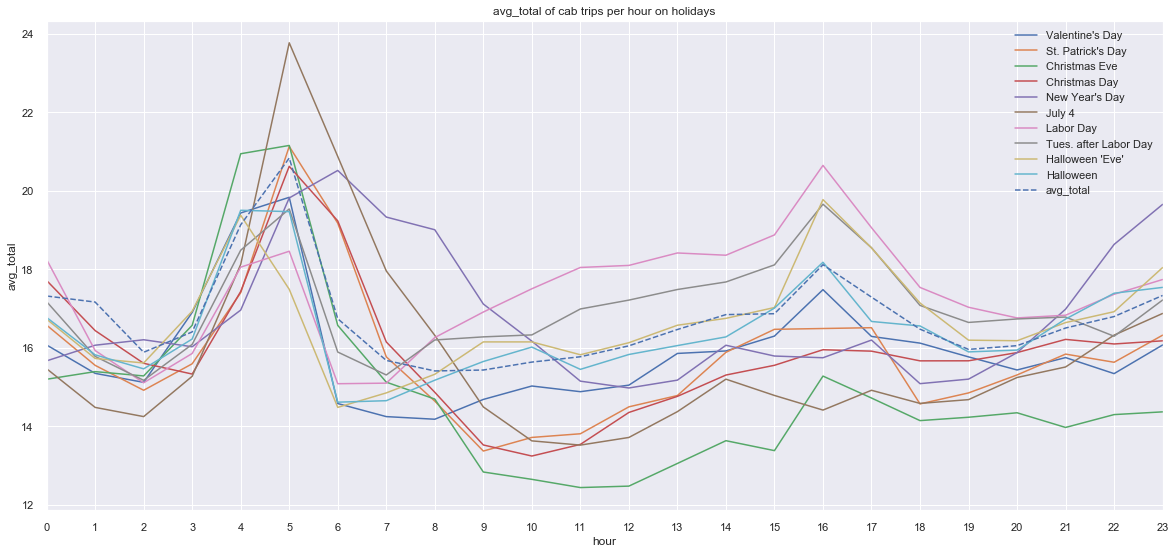

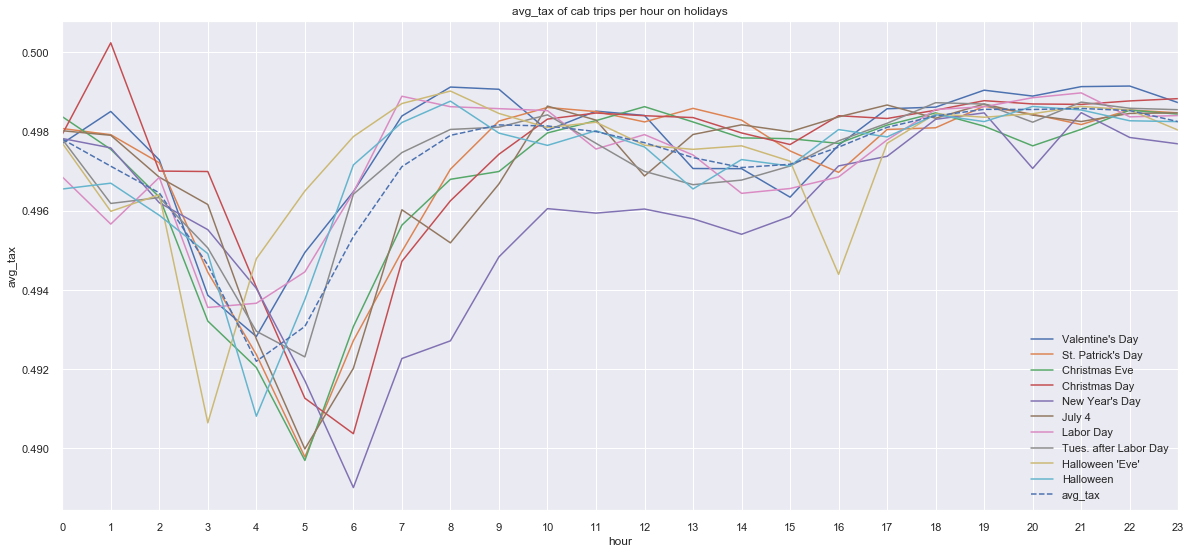

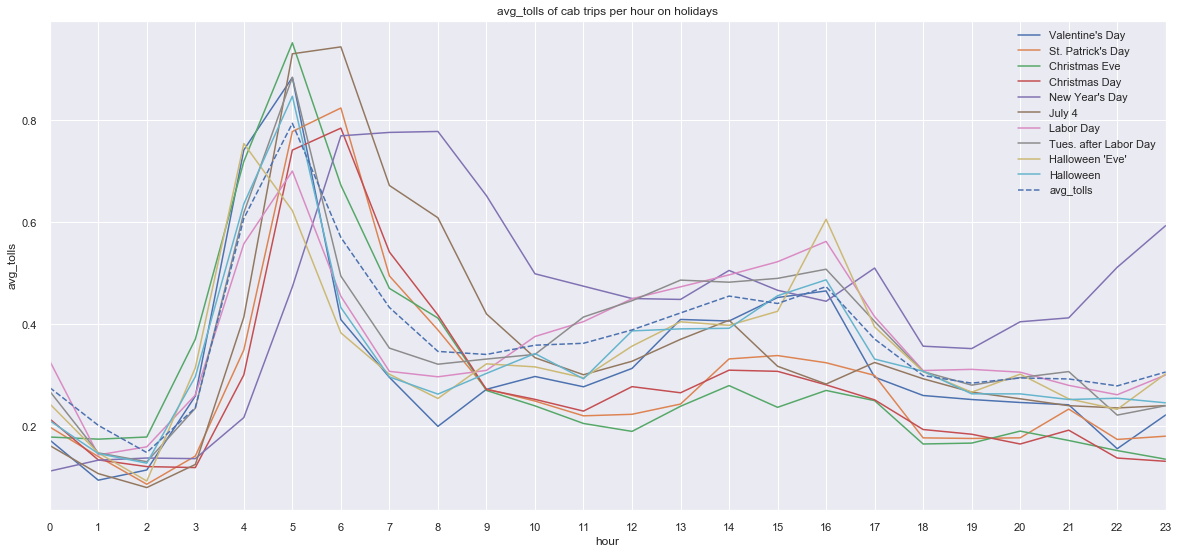

In [378]:
on_this_day(dates, metrics)

In [379]:
airport_rides = db.query("""SELECT 
  pickup_datetime, dropoff_datetime,
  CASE 
    WHEN rate_code = '2' THEN 'JFK'
    WHEN rate_code = '3' THEN 'Newark'
    WHEN rate_code = '4' THEN 'Nassau or Westchester' END AS airport_code,
    z1.zone_name AS pickup_zone, z2.zone_name AS dropoff_zone, dropoff_location_id, pickup_location_id, trip_distance, total_amount
FROM `nyc-transit-256016.nyc_taxi.tlc_yellow_trips_2018`
LEFT JOIN `nyc-transit-256016.nyc_taxi.taxi_zone_geom` z1
ON pickup_location_id = z1.zone_id
LEFT JOIN `nyc-transit-256016.nyc_taxi.taxi_zone_geom` z2
ON dropoff_location_id = z2.zone_id
WHERE trip_distance BETWEEN 0 AND 2000 AND total_amount > 0 AND rate_code IN ('2', '3', '4')
;""")

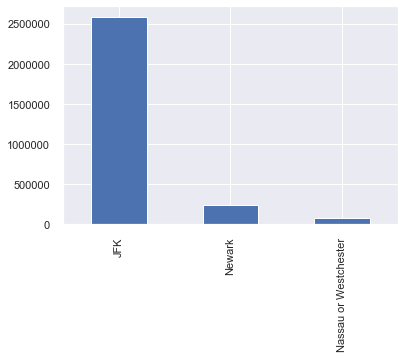

In [389]:
airport_rides['airport_code'].value_counts().plot(kind='bar');

In [437]:
pickup_to_dropoff = airport_rides[airport_rides.airport_code == 'JFK'].drop_duplicates().groupby('pickup_zone').dropoff_zone.value_counts() 
pickup_to_dropoff_unique = airport_rides[airport_rides.airport_code == 'JFK'].groupby('pickup_zone')['dropoff_zone'].nunique()



In [438]:
dropoff_to_pickup = airport_rides[airport_rides.airport_code == 'JFK'].drop_duplicates().groupby('dropoff_zone').pickup_zone.value_counts()
dropoff_to_pickup_unique = airport_rides[airport_rides.airport_code == 'JFK'].groupby('dropoff_zone')['pickup_zone'].nunique()


In [440]:
pickup_to_dropoff.head()

pickup_zone              dropoff_zone           
Allerton/Pelham Gardens  Allerton/Pelham Gardens       2
Alphabet City            JFK Airport                1028
                         Alphabet City               315
                         East Village                 37
                         Two Bridges/Seward Park      11
Name: dropoff_zone, dtype: int64

In [441]:
plt.scatter(x=pickup_to_dropoff)

TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
std_per_hour = db.query("""
SELECT 
  EXTRACT(MONTH FROM pickup_datetime) AS month,
  EXTRACT(DAY FROM pickup_datetime) AS day,
  EXTRACT(HOUR FROM pickup_datetime) AS hour,
  STDDEV(trip_distance) AS STD_distance, STDDEV(fare_amount) AS STD_fare, STDDEV(tip_amount) AS STD_tip, STDDEV(total_amount) AS STD_total, STDDEV(mta_tax) AS STD_tax, STDDEV(tolls_amount) AS STD_tolls
FROM `nyc-transit-256016.nyc_taxi.tlc_yellow_trips_2018`
WHERE trip_distance BETWEEN 0 AND 2000 AND total_amount > 0
GROUP BY month, day, hour
ORDER BY month, day, hour
;
""")

In [ ]:
'''query to return averages per unit of time, to the hour'''

avgs_per_hour = db.query("""SELECT 
  EXTRACT(MONTH FROM pickup_datetime) AS month,
  EXTRACT(DAY FROM pickup_datetime) AS day,
  EXTRACT(HOUR FROM pickup_datetime) AS hour,
  CAST(trip_distance AS FLOAT64) AS distance, CAST(fare_amount AS FLOAT64) AS fare, CAST(tip_amount AS FLOAT64) AS avg_tip, CAST(total_amount AS FLOAT64) AS total, CAST(mta_tax AS FLOAT64) AS avg_tax, CAST(tolls_amount AS FLOAT64) AS tolls
FROM `nyc-transit-256016.nyc_taxi.tlc_yellow_trips_2018`
WHERE trip_distance BETWEEN 0 AND 2000 AND total_amount > 0
GROUP BY month, day, hour
ORDER BY month, day, hour
;""")

In [ ]:
'''query to return averages per zone per unit of time, to the hour'''

avgs_per_zone = db.query("""SELECT 
  EXTRACT(MONTH FROM pickup_datetime) AS month,
  EXTRACT(DAY FROM pickup_datetime) AS day,
  EXTRACT(HOUR FROM pickup_datetime) AS hour,
  pickup_location_id, z1.zone_name AS pickup_zone, dropoff_location_id, z2.zone_name AS dropoff_zone,
  AVG(CAST(trip_distance AS FLOAT64)) AS avg_distance, AVG(CAST(fare_amount AS FLOAT64)) AS avg_fare, AVG(CAST(tip_amount AS FLOAT64)) AS avg_tip, AVG(CAST(total_amount AS FLOAT64)) AS avg_total, AVG(CAST(mta_tax AS FLOAT64)) AS avg_tax, AVG(CAST(tolls_amount AS FLOAT64)) AS avg_tolls
FROM `nyc-transit-256016.nyc_taxi.tlc_yellow_trips_2018`
LEFT JOIN `nyc-transit-256016.nyc_taxi.taxi_zone_geom` z1
ON pickup_location_id = z1.zone_id
LEFT JOIN `nyc-transit-256016.nyc_taxi.taxi_zone_geom` z2
ON dropoff_location_id = z2.zone_id
WHERE trip_distance BETWEEN 0 AND 2000 AND total_amount > 0
GROUP BY month, day, hour, pickup_location_id, pickup_zone, dropoff_location_id, dropoff_zone
ORDER BY month, day, hour
;""")